In [2]:
import game_data, fbref_functions

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [3]:
home_team = "liverpool"
away_team = "everton"
season = 2023
competition = "england"

In [4]:
home_df = game_data.home_player_stats(competition, season, home_team, away_team)
away_df = game_data.away_player_stats(competition, season, home_team, away_team)

In [5]:
home_df['team'] = home_team
away_df['team'] = away_team
full_df = pd.concat([home_df, away_df])

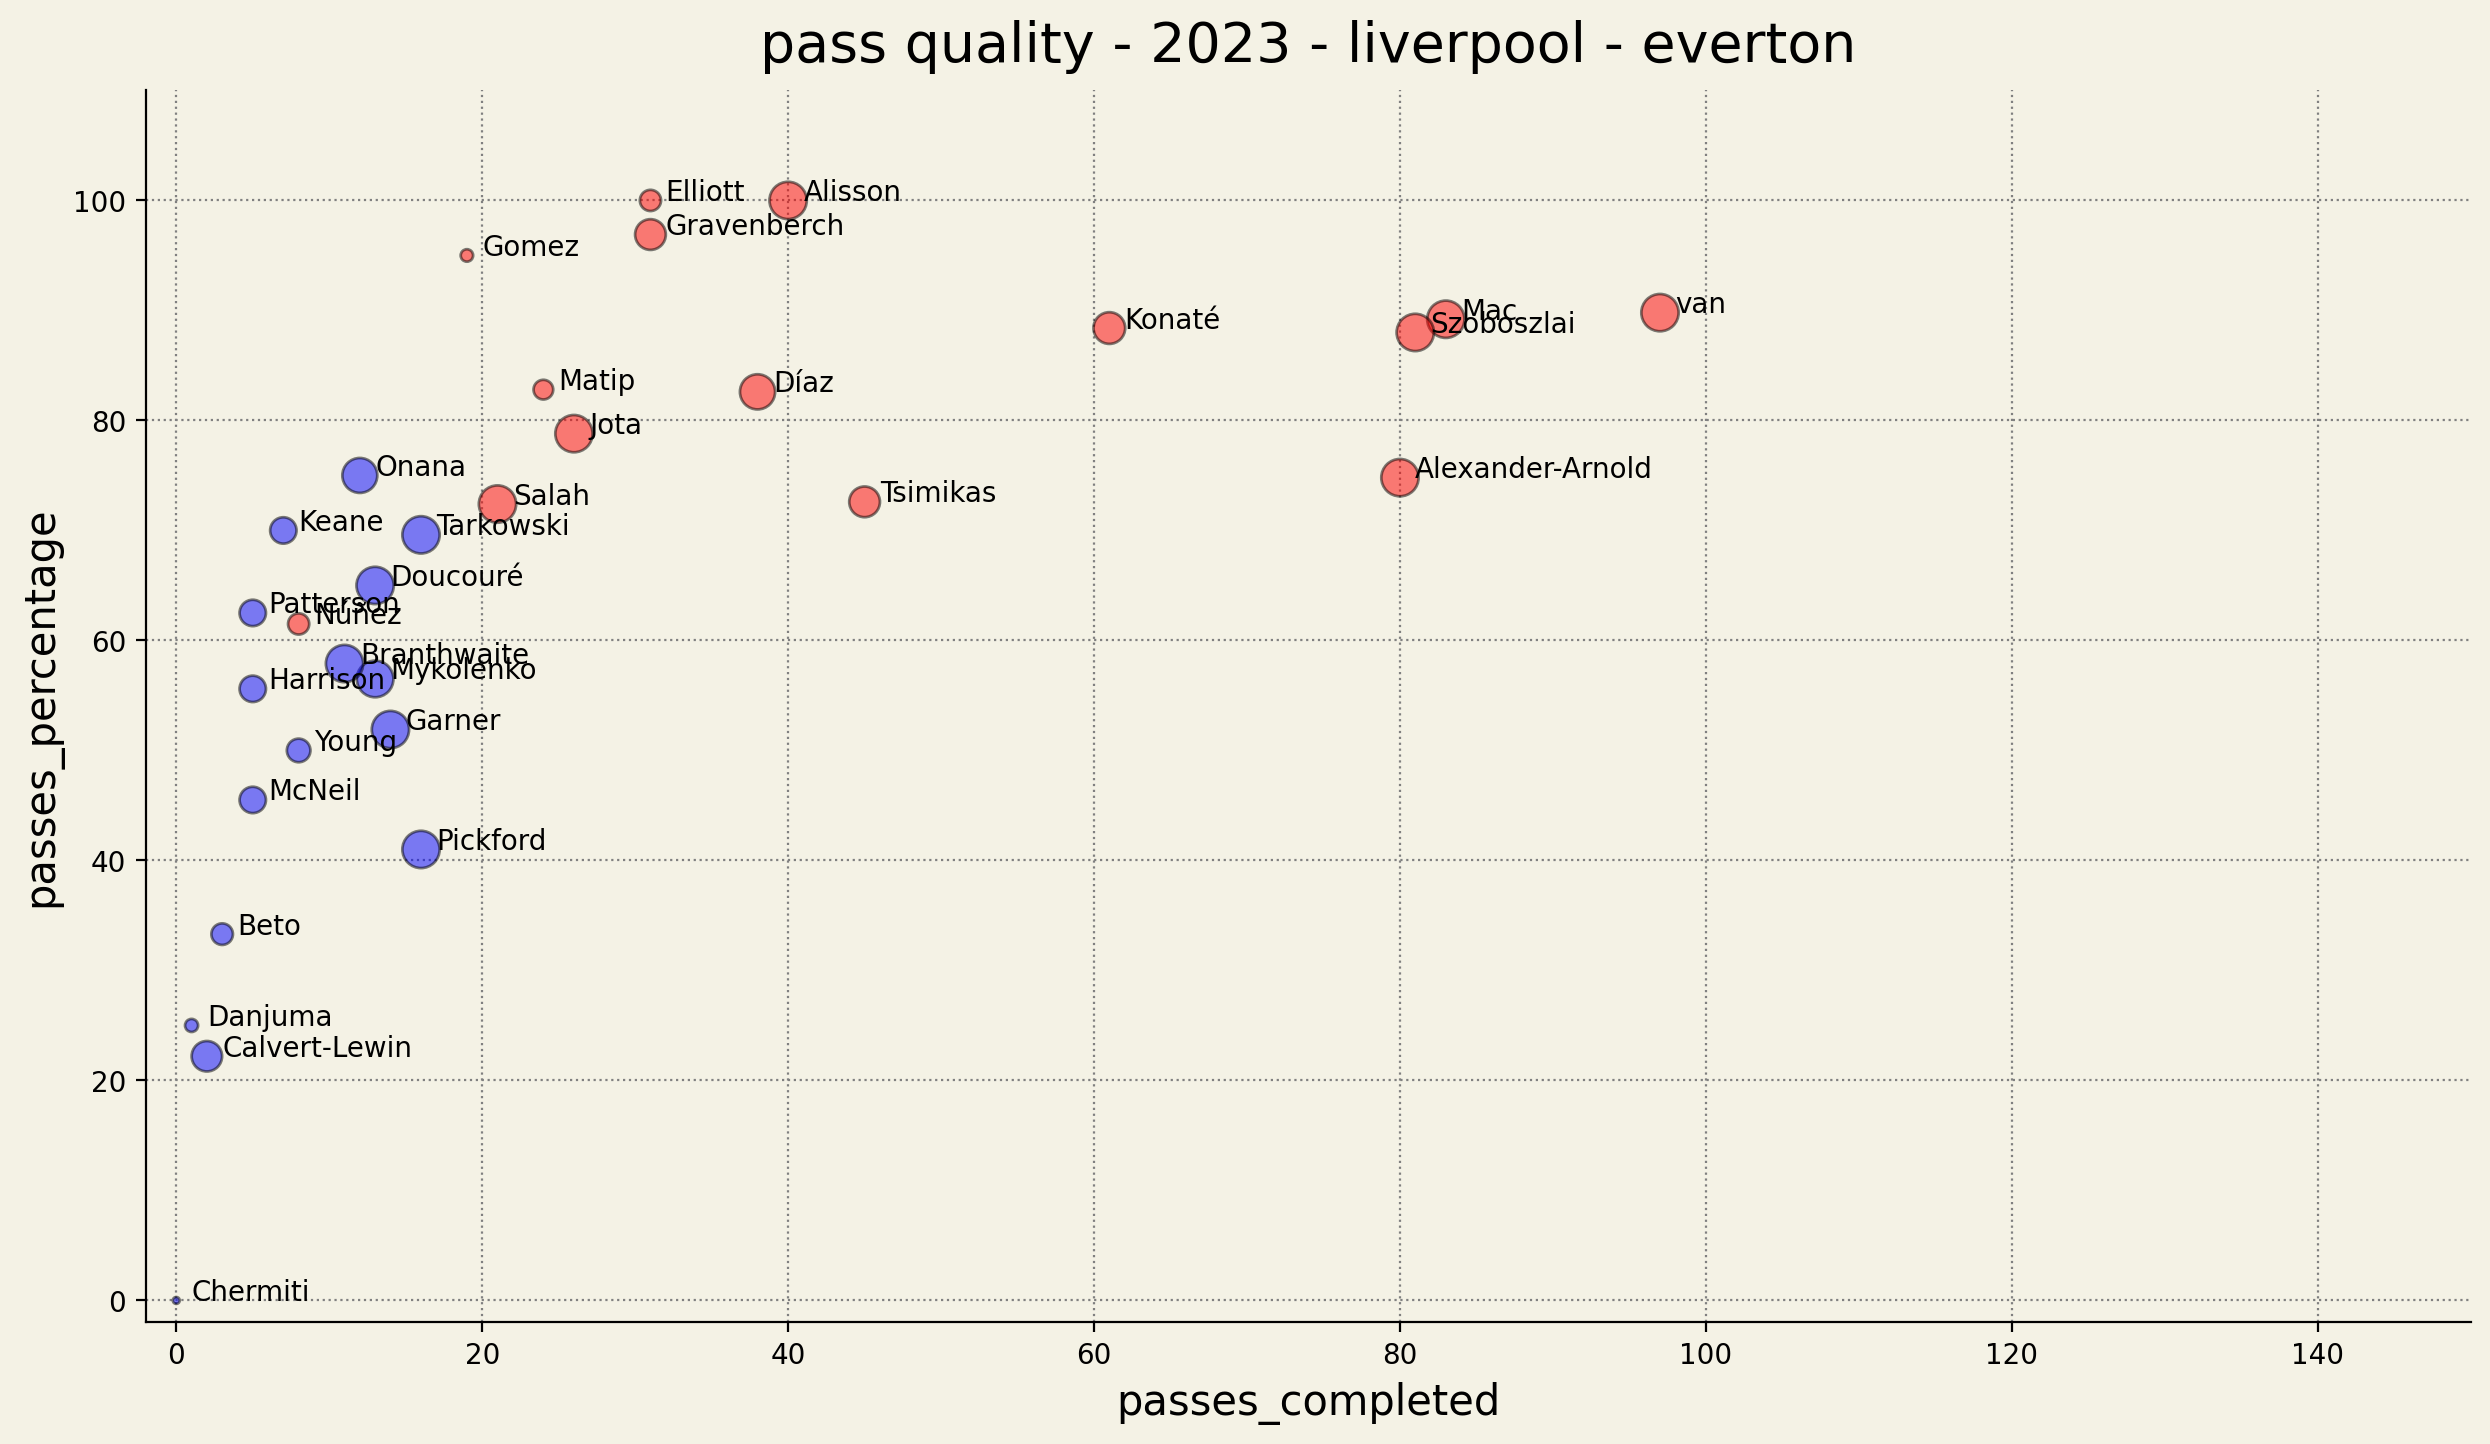

In [17]:
plt.figure(figsize = (15,8), dpi = 200, facecolor = '#f4f2e5')

ax = plt.axes()
ax.grid(True, c = "grey", ls = ":")
ax.set_facecolor("#f4f2e5")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylim([-2, 110])
plt.xlim([-2, 150])

plt.title(f"pass quality - {season} - {home_team} - {away_team}", fontsize = 20, y = 1.01) 

ax.set_ylabel(f"passes_percentage", fontsize = 15)
ax.set_xlabel(f"passes_completed", fontsize = 15)

liverpool = full_df.loc[full_df['team'] == "liverpool"]
everton = full_df.loc[full_df['team'] == "everton"]

ax.scatter(liverpool['passes_completed'], liverpool['passes_pct'], s = liverpool['minutes'] * 2, c = "red", ec = "black", alpha = 0.5, label = "Premier League", zorder=3)
ax.scatter(everton['passes_completed'], everton['passes_pct'], s = everton['minutes'] * 2, c = "blue", ec = "black", alpha = 0.5, label = "Premier League", zorder=3)

for i, row in full_df.iterrows():
    ax.text(row['passes_completed'] + 1, row['passes_pct'], row['player'].split(" ")[0])